In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [254]:
file2 = 'churn_data2.csv'

In [255]:
df2 = pd.read_csv(file2)

In [256]:
df1.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [257]:
df2.shape

(165034, 14)

In [258]:
df2.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [259]:
df2.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [260]:
df2.head(20)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [261]:
# Drop CustomerId, id and surname
df2.drop('CustomerId', axis=1, inplace=True)
df2.drop('id', axis=1, inplace=True)
df2.drop('Surname', axis=1, inplace=True)

In [262]:
# Kept columns
# CreditScore: int64 values indicating the credit score of the customer
# Geography: Categorical data indicating the country or region.
# Gender: Categorical data indicating the gender
# Age: float64 values showing the age of customer.
# Tenure: int64 values indicating the number of years with the bank
# Balance: float64 values indicating customers balance in the bank
# NumOfProducts: int64 values indicating the number of products the customer has
# HasCrCard: int64 Binary values showing whether the customer has a credit card.
# IsActiveMember: float64 Binary values showing whether they are an an active customer.
# EstimatedSalary: float64 Numerical values showing the the estimated salary of customers.
# Exited: int64 Binary values showing whether customer left the bank

In [263]:
df2.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [264]:
# Change floats to integers
df2['IsActiveMember'] = df2['IsActiveMember'].astype(int)
df2['HasCrCard'] = df2['HasCrCard'].astype(int)
df2['Age'] = df2['Age'].astype(int)
df2['IsActiveMember'] =  df2['IsActiveMember'].astype(int)

In [265]:
df2.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0


In [266]:
y  = df2.duplicated().sum()

In [267]:
#No duplicates, no NA

In [268]:
NAN1 = df2.isna().sum()

In [269]:
#No nans
NAN1

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [270]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33,5,0.00,2,1,1,15068.83,0


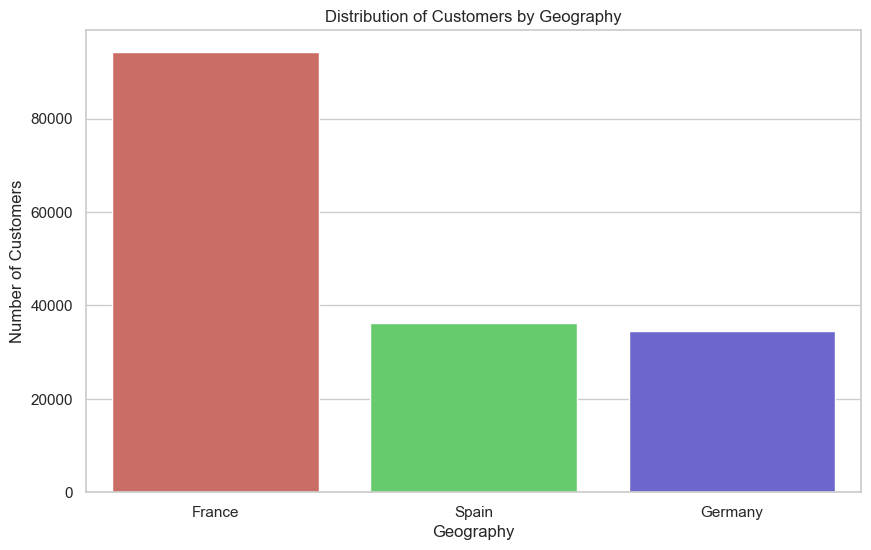

In [271]:
# Set a white grid
sns.set(style="whitegrid")

# Creating a bar plot for the 'Geography' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=df2, palette="hls")

plt.title('Distribution of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

NameError: name 'norm' is not defined

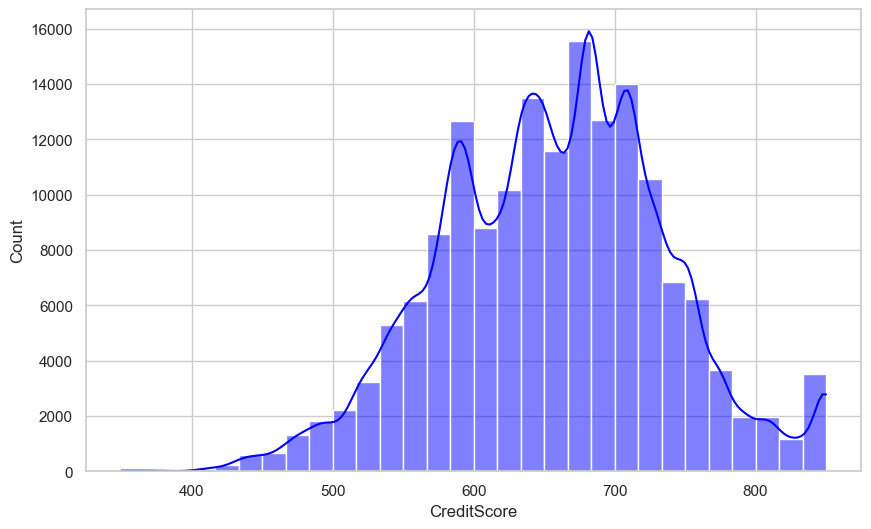

In [272]:
# Set white grid
sns.set(style="whitegrid")

# Create a histogram with a KDE for 'CreditScore'
plt.figure(figsize=(10, 6))
sns.histplot(df2['CreditScore'], kde=True, bins=30, color='blue')

# Create a normal distribution for credit score
mean, std = norm.fit(df2['CreditScore'])
# define the range for the normal distribution
xmin, xmax = plt.xlim()
# Create x for x axis
x = np.linspace(xmin, xmax, 100)
# Use a probability density function to define distribution probabilities
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

# Adding a title and labels
plt.title('Normal Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Density')

# Show the plot
plt.show()

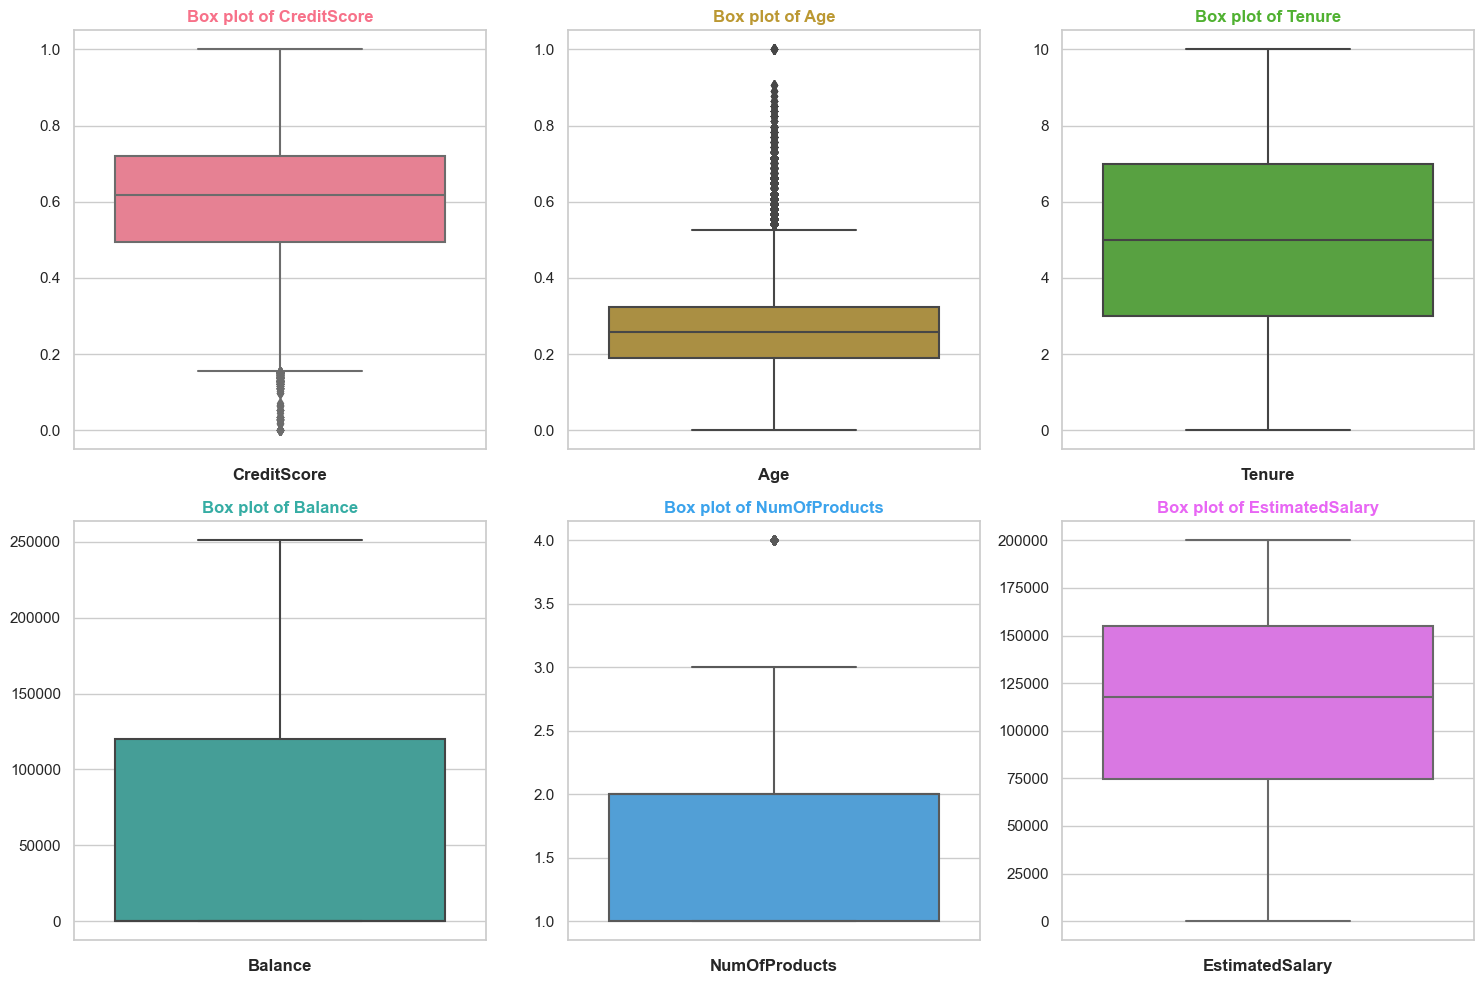

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Setting a color palette
palette = sns.color_palette("husl", len(numerical_columns))

# Create different box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df2[col], palette=[palette[i]])
    plt.title(f'Box plot of {col}', fontweight='bold', color=palette[i])
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('')

plt.tight_layout()
plt.show()

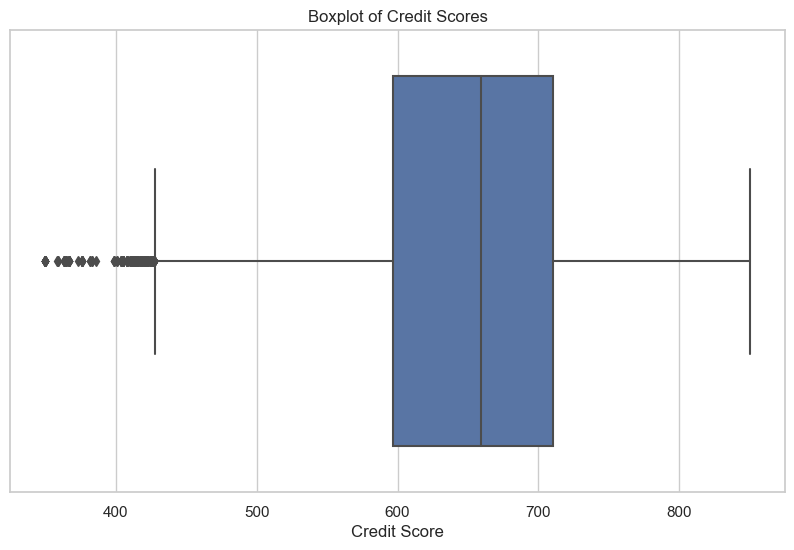

In [273]:
sns.set(style="whitegrid")

# Create a boxplot for CreditScore
plt.figure(figsize=(10, 6))
sns.boxplot(x=df2['CreditScore'])

# Add a title and labels
plt.title('Boxplot of Credit Scores')
plt.xlabel('Credit Score')

# Show the plot
plt.show()

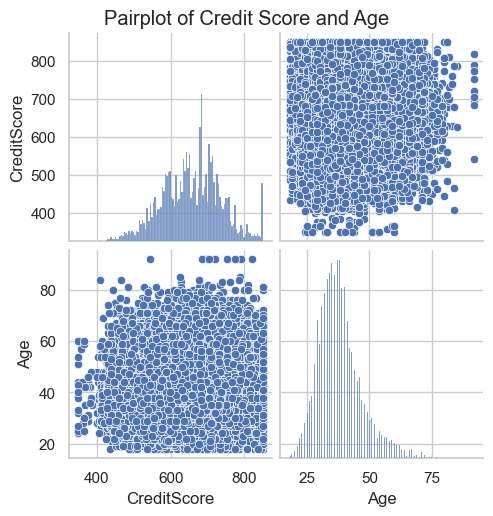

In [274]:
# Selecting only the 'CreditScore' and 'Age' columns for the pairplot
data_to_plot = df2[['CreditScore', 'Age']]

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a pairplot
sns.pairplot(data_to_plot)

# Add a title to the plot
plt.suptitle('Pairplot of Credit Score and Age', y=1.02)

# Show the plot
plt.show()

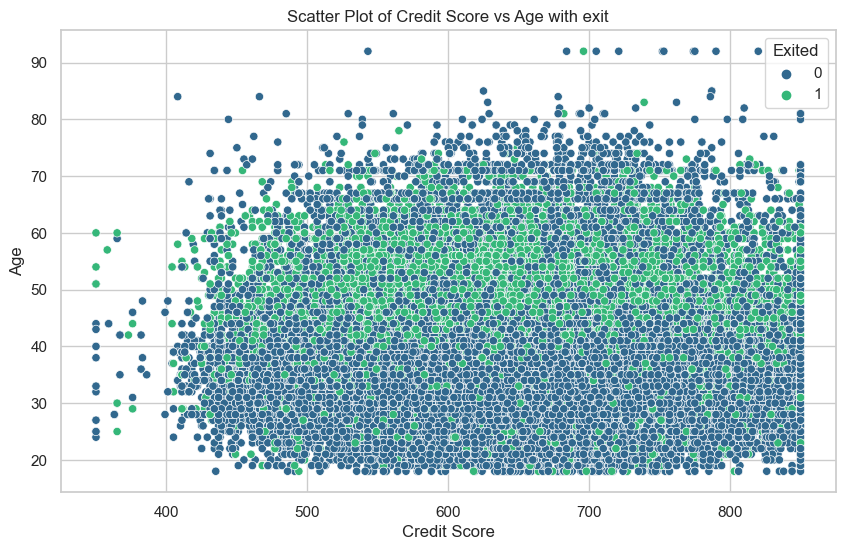

In [275]:
sns.set(style="whitegrid")

# Create a scatter plot with color based on 'Exited'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='Age', hue='Exited', data=df2, palette='viridis')

# Adding a title and labels
plt.title('Scatter Plot of Credit Score vs Age with exit')
plt.xlabel('Credit Score')
plt.ylabel('Age')

# Show the plot
plt.show()

In [276]:
scaler = MinMaxScaler()

# Normalize the 'CreditScore' and 'Age' columns
df2[['CreditScore', 'Age']] = scaler.fit_transform(df2[['CreditScore', 'Age']])

# Check the first few rows of the normalized columns
print(df2[['CreditScore', 'Age']].head())

   CreditScore       Age
0        0.636  0.202703
1        0.554  0.202703
2        0.656  0.297297
3        0.462  0.216216
4        0.732  0.202703


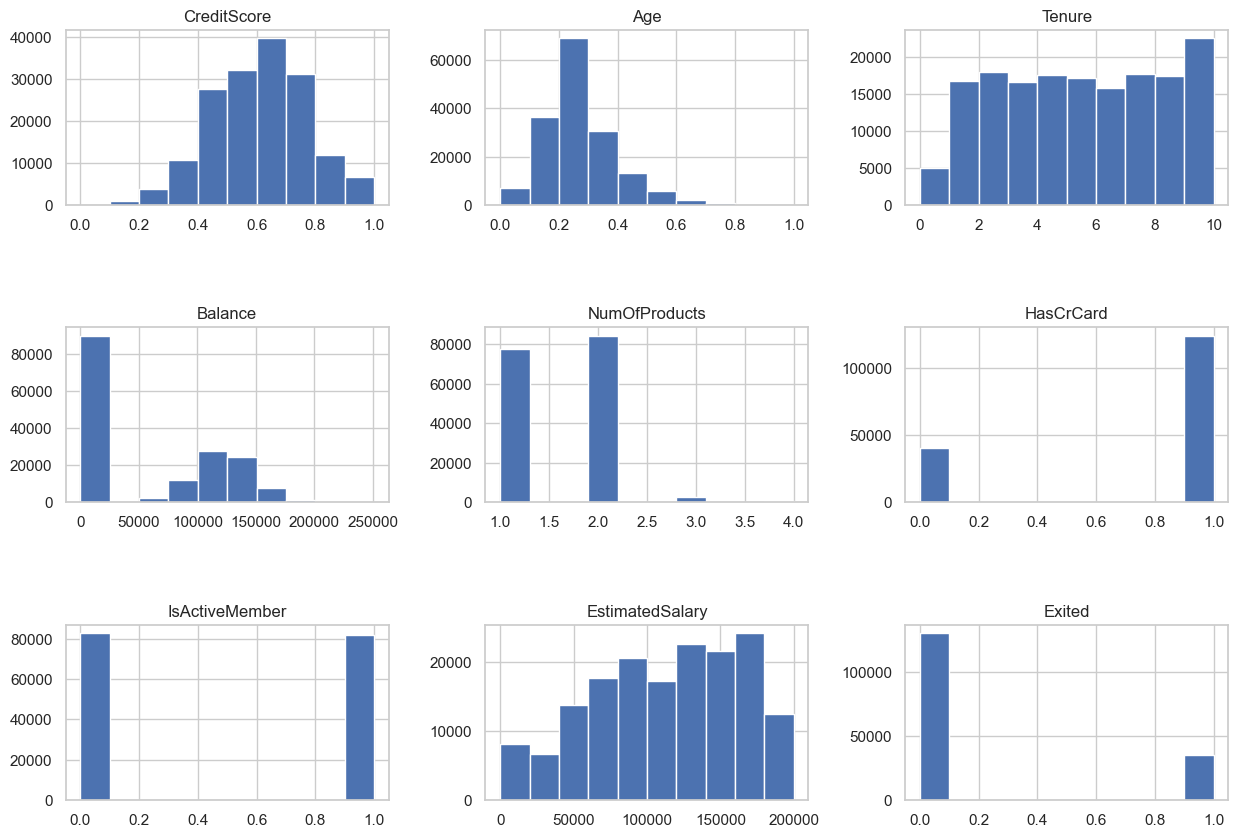

In [277]:
df2.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)

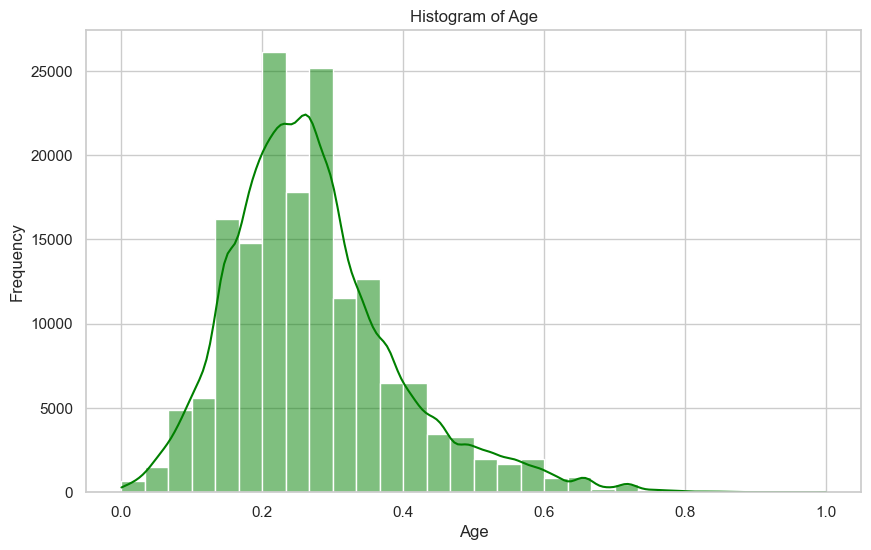

In [278]:
sns.set(style="whitegrid")

# Create a histogram for the 'Age' column
plt.figure(figsize=(10, 6))
sns.histplot(df2['Age'], kde=True, bins=30, color='green')

# Adding a title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [279]:
df2.to_csv('cleaned.csv')

In [280]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.636,France,Male,0.202703,3,0.00,2,1,0,181449.97,0
1,0.554,France,Male,0.202703,1,0.00,2,1,1,49503.50,0
2,0.656,France,Male,0.297297,10,0.00,2,1,0,184866.69,0
3,0.462,France,Male,0.216216,2,148882.54,1,1,1,84560.88,0
4,0.732,Spain,Male,0.202703,5,0.00,2,1,1,15068.83,0


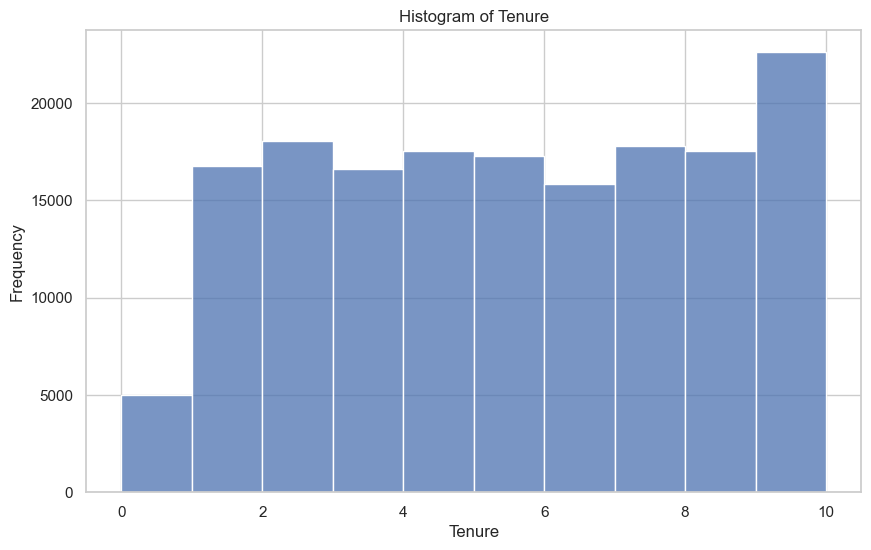

In [283]:
# Plotting the histogram with KDE for 'Tenure'
plt.figure(figsize=(10, 6))
sns.histplot(df2['Tenure'], bins=10, kde=False)

plt.title('Histogram of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()